In [ ]:
#yet another new script - this time, now that we have hovmoller plots of frequency and intensity for arbitrary time
#periods, go and calculate their significance

#In the case of frequency changes, we can calculate the change in significance analytically because a binary variable
#obeys a Bernoulli distribution, with variance p*(1-p) and standard error (p*(1-p)/n)^(1/2),

#Another really important factor is that we'll eventually have to calculate the autocorrelation
#in other words, the probability of seeing a rainband on one day is higher than usual if we've just seen one
#this will lower the effective sample size n = N/tau with N as total observations.

In [1]:
import numpy as np
import time
import os
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
#import masked arrays - important because intensity shows up as a NaN at some points
%matplotlib notebook

In [20]:
## LOAD FROM NETCDF FILE ##
savefile = "RDA_hov_periods"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"

#netCDF output file formatting formatting
hovname = ferretpath + savefile + ".nc"
hovnc = nc.Dataset(hovname, "r")

#populate lists with intensity occupancy plots for each different time period (periods given below)
p1_beg = [1951,1980]
p1_end = [1979,1993]
p2_beg = [1980,1994]
p2_end = [2007,2007]

#in this case, we're just going to load the smoothed plots of hovmoller frequency
lats_1_p1 = []
lats_p1 = []

lats_1_p2 = []
lats_p2 = []


for p1_b, p1_e, p2_b, p2_e in zip(p1_beg, p1_end, p2_beg, p2_end):

    years_p1= str(p1_b-1900) + str("{0:0=2d}".format((p1_e-1900)%100))
    print(years_p1)
    years_p2= str(p2_b-1900) + str("{0:0=2d}".format((p2_e-1900)%100))
    print(years_p2)
    
    lats_1_p1.append(hovnc['lat_1_hov_smth_' + years_p1][:])
    lats_p1.append(hovnc['lat_hov_smth_' + years_p1][:])
    
    lats_1_p2.append(hovnc['lat_1_hov_smth_' + years_p2][:])
    lats_p2.append(hovnc['lat_hov_smth_' + years_p2][:])
    
hovnc.close()

5179
8007
8093
9407


<IPython.core.display.Javascript object>


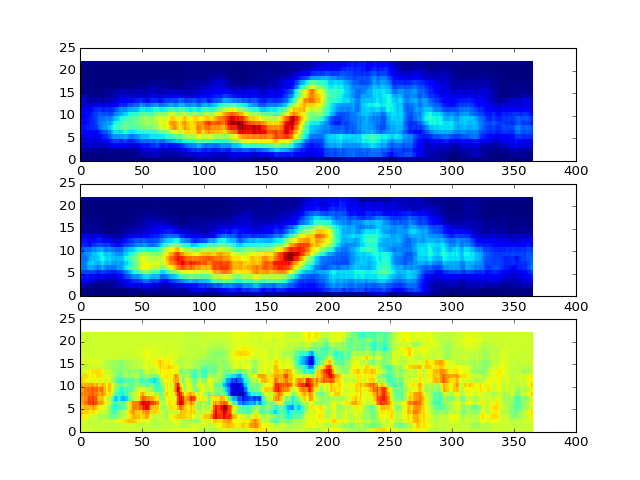

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.pcolormesh(lats_1_p1[0].T)

ax1 = fig.add_subplot(312)
plt.pcolormesh(lats_1_p2[0].T)

ax1 = fig.add_subplot(313)
plt.pcolormesh(lats_1_p2[0].T-lats_1_p1[0].T)

<IPython.core.display.Javascript object>


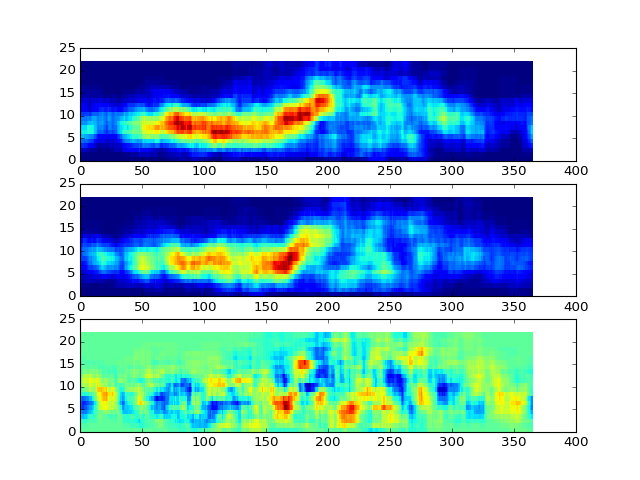

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.pcolormesh(lats_1_p1[1].T)

ax1 = fig.add_subplot(312)
plt.pcolormesh(lats_1_p2[1].T)

ax1 = fig.add_subplot(313)
plt.pcolormesh(lats_1_p2[1].T-lats_1_p1[1].T)

In [30]:
.25/65

0.0038461538461538464

In [ ]:
#find standard deviation for each day and bin
lats_1_p1_std = [ smooth(x,15,5) for x in lats_1_p1 ]
lats_p1_std = [ smooth(x,15,5) for x in lats_p1 ]

lats_1_p2_std = [ smooth(x,15,5) for x in lats_1_p2 ]
lats_p2_std = [ smooth(x,15,5) for x in lats_p2 ]